In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from matplotlib import pyplot
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

df = pd.read_csv('df-climatechange.csv')
df = df.drop([ 'qb1a'], axis = 1)
df['qb5'] = df['qb5'].replace({'No': 0, 'Yes':1})

#pd.set_option('display.max_columns', None)
df1 = df[df.qb2 >= 6]
df2 = df[df.qb2 <= 5]

In [22]:
cc_num = df[['qb5', 'qb2' , 'd1', 'd10','d11', 'country','d8','d25', 'd63','d7','cluster', 'cca']]

cat_var =['d1','d10', 'country','d8','d25', 'd63','d7','cluster', 'cca']
df_get_dummies = pd.get_dummies(  cc_num , columns = cat_var)



X = df_get_dummies.drop('qb5',axis=1)
y = df_get_dummies.loc[:, df_get_dummies.columns == 'qb5']


C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


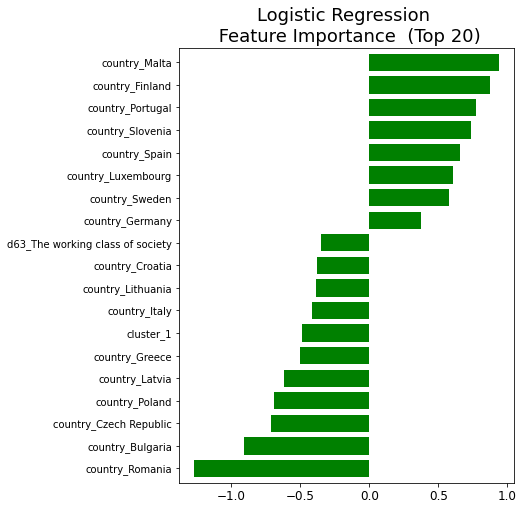

In [23]:
seed = 111  # so that the result is reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = seed,stratify=y)
logreg = LogisticRegression(C=0.1, class_weight={0: 1.43631197, 1: 0.76700502})
logreg = logreg.fit(X_train, y_train)

#checking the magnitude of coefficients
from pandas import Series, DataFrame
predictors = X_train.columns

coef = Series(logreg.coef_.flatten(), predictors).sort_values()
sel = coef[np.abs(coef)>=0.335]

plt.figure(figsize = (6, 8))
 
sel.plot.barh(  width = 0.77, color = 'green')
plt.xticks(fontsize=12)

plt.title('Logistic Regression \n Feature Importance  (Top 20)',
          fontdict= {'fontsize' : 18})

plt.show()


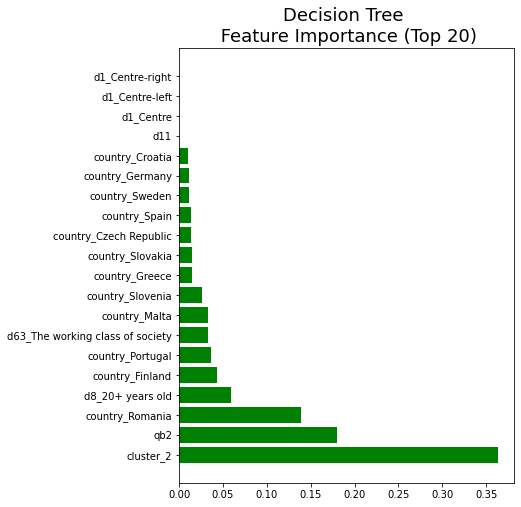

In [24]:
seed = 123  # so that the result is reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = seed,stratify=y)
clf_pruned = DecisionTreeClassifier(criterion = 'entropy' ,ccp_alpha=0.000993163342228487, random_state=seed, class_weight= {0: 1.43631197 , 1:0.76700502},  max_depth=8, min_samples_split = 4, min_samples_leaf = 1)
clf_pruned.fit(X_train, y_train)

feature_importances = list(zip(X_train, clf_pruned.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_names_20 = [i[0] for i in feature_importances_ranked[:20]]
y_ticks = np.arange(0, len(feature_names_20))
x_axis = [i[1] for i in feature_importances_ranked[:20]]
plt.figure(figsize = (6, 8))
plt.barh(feature_names_20, x_axis, color = 'g')   #horizontal barplot
plt.title('Decision Tree \n Feature Importance (Top 20)',
          fontdict= {'fontsize' : 18})
plt.show()
#plt.savefig('dt_featureimportance.png')

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


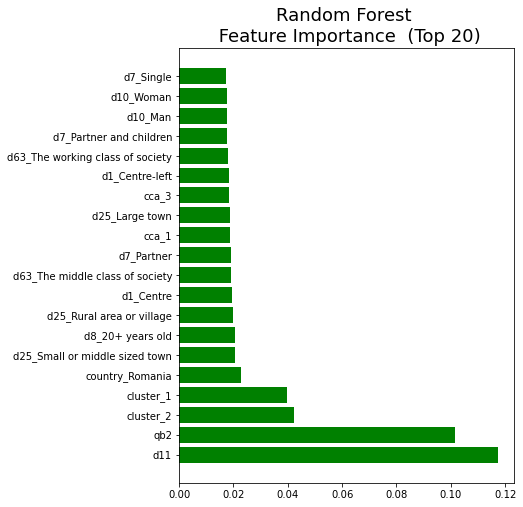

In [25]:
seed = 101

X = df_get_dummies.drop('qb5',axis=1)
y = df_get_dummies.loc[:, df_get_dummies.columns == 'qb5']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = seed,stratify=y)

rf = RandomForestClassifier(class_weight={0: 1.43631197, 1: 0.76700502},
                       max_depth=25, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=400)

rf = rf.fit(X_train, y_train)
feature_importances = list(zip(X_train, rf.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_names_20 = [i[0] for i in feature_importances_ranked[:20]]
y_ticks = np.arange(0, len(feature_names_20))
x_axis = [i[1] for i in feature_importances_ranked[:20]]
plt.figure(figsize = (6, 8))

plt.barh(feature_names_20, x_axis, color = 'g')   #horizontal barplot
plt.title('Random Forest \n Feature Importance  (Top 20)',
          fontdict= {'fontsize' : 18})
plt.show()

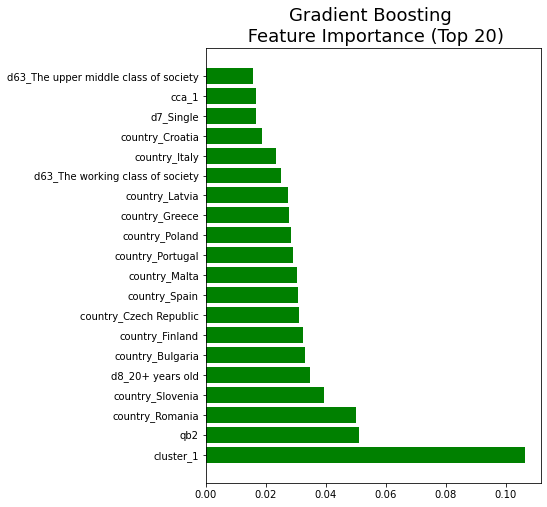

In [35]:
#choose scale_pos_weight = 0.75
gb_classifier = xgb.XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=seed,  scale_pos_weight=0.75, class_weight={0: 1.43631197 , 1:0.76700502}, min_child_weight= 5, gamma = 2)

gb_classifier.fit(X_train,  y_train.values.ravel())
feature_importances = list(zip(X_train, gb_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)

feature_names_20 = [i[0] for i in feature_importances_ranked[:20]]
y_ticks = np.arange(0, len(feature_names_20))
x_axis = [i[1] for i in feature_importances_ranked[:20]]
plt.figure(figsize = (6, 8))
plt.barh(feature_names_20, x_axis, color = 'g')   #horizontal barplot
plt.title('Gradient Boosting \n Feature Importance (Top 20)',
          fontdict= {'fontsize' : 18})
plt.show()